In [1]:
#IMPORTING DEPENDENCIES

In [2]:
!pip list

Package                       Version
----------------------------- -----------
absl-py                       1.4.0
aiofiles                      22.1.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-client               1.11.2
anaconda-navigator            2.4.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-lru                     2.0.2
atomicwrites                  1.4.0
attrs                         22.1.0
Automat                       20.2.0
autopep8                      1.6.0
Babel                         2.11.0
backcall   

In [1]:
%pip install opencv-python matplotlib imageio gdown tensorflow

In [ ]:
#Expo memory growth
#tf.config.list_physical_devices('GPU')

In [ ]:
#physical_devices = tf.config.list_physical_devices('GPU')
#try:
#    tf.config.experimental.set_memory_growth(physical_devices[0], True)
#except:
#    pass

In [ ]:
import gdown

In [ ]:
url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
output = 'data.zip'
gdown.download(url, output, quiet=False)
gdown.extractall('data.zip')

In [3]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

In [4]:
def load_video(path:str) -> List[float]: 

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): 
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()
    
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [5]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [6]:
vocab

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [7]:
#Speech recog Loss func
#Tokenizes 
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [8]:
char_to_num.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [10]:
num_to_char.get_vocabulary()

['',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [11]:
#testing above function
char_to_num(['h','e','l','l','o'])

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([ 8,  5, 12, 12, 15])>

In [12]:
num_to_char([ 8,  5, 12, 12, 15])

<tf.Tensor: shape=(5,), dtype=string, numpy=array([b'h', b'e', b'l', b'l', b'o'], dtype=object)>

In [13]:
def load_alignments(path:str) -> List[str]: 
    with open(path, 'r') as f: 
        lines = f.readlines() 
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil': 
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]


In [14]:
def load_data(path: str): 
    path = bytes.decode(path.numpy())
    file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    #file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path) 
    alignments = load_alignments(alignment_path)
    
    return frames, alignments

In [15]:
test_path = './data/s1/bbal6n.mpg'

In [16]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('/')[-1].split('.')[0]

'bbal6n'

In [17]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

In [18]:
frames

<tf.Tensor: shape=(75, 46, 140, 1), dtype=float32, numpy=
array([[[[ 1.4622626 ],
         [ 1.4622626 ],
         [ 1.3832215 ],
         ...,
         [ 0.19760306],
         [ 0.19760306],
         [ 0.07904123]],

        [[ 1.4622626 ],
         [ 1.4622626 ],
         [ 1.3832215 ],
         ...,
         [ 0.19760306],
         [ 0.07904123],
         [ 0.03952061]],

        [[ 1.422742  ],
         [ 1.422742  ],
         [ 1.3832215 ],
         ...,
         [ 0.07904123],
         [ 0.11856184],
         [ 0.11856184]],

        ...,

        [[ 0.9089741 ],
         [ 0.9089741 ],
         [ 0.9089741 ],
         ...,
         [ 9.959194  ],
         [ 9.919674  ],
         [ 9.919674  ]],

        [[ 0.9089741 ],
         [ 0.9089741 ],
         [ 0.9089741 ],
         ...,
         [ 9.880154  ],
         [ 9.880154  ],
         [ 9.880154  ]],

        [[ 0.9089741 ],
         [ 0.9089741 ],
         [ 0.9089741 ],
         ...,
         [ 9.880154  ],
         [ 9.88015

In [19]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23])>

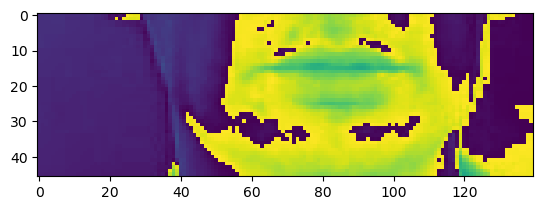

In [20]:
plt.imshow(frames[50])


In [21]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])


<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [22]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

In [23]:
from matplotlib import pyplot as plt

In [34]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split 
#train = data.take(450)
#test = data.skip(450)

In [35]:
data.as_numpy_iterator().next()

(array([[[[[1.1727301 ],
           [1.1727301 ],
           [1.1727301 ],
           ...,
           [0.60528004],
           [0.52962005],
           [0.60528004]],
 
          [[1.1727301 ],
           [1.1727301 ],
           [1.1727301 ],
           ...,
           [0.60528004],
           [0.49179003],
           [0.60528004]],
 
          [[1.0970701 ],
           [1.0970701 ],
           [1.0970701 ],
           ...,
           [0.52962005],
           [0.98358005],
           [0.18915   ]],
 
          ...,
 
          [[0.79443   ],
           [0.79443   ],
           [0.79443   ],
           ...,
           [8.776561  ],
           [8.39826   ],
           [8.62524   ]],
 
          [[0.7566    ],
           [0.7566    ],
           [0.7566    ],
           ...,
           [9.268351  ],
           [8.1334505 ],
           [7.9821305 ]],
 
          [[0.7566    ],
           [0.7566    ],
           [0.7566    ],
           ...,
           [0.07566001],
           [7.8686404 

In [36]:
frames, alignments = data.as_numpy_iterator().next()


In [37]:
test = data.as_numpy_iterator()

In [54]:
val = test.next(); val[0]

array([[[[[ 1.4501754 ],
          [ 1.4501754 ],
          [ 1.4109815 ],
          ...,
          [ 0.07838786],
          [ 0.03919393],
          [ 0.03919393]],

         [[ 1.4501754 ],
          [ 1.4501754 ],
          [ 1.4109815 ],
          ...,
          [ 0.07838786],
          [ 0.03919393],
          [ 0.03919393]],

         [[ 1.4109815 ],
          [ 1.4109815 ],
          [ 1.4109815 ],
          ...,
          [ 0.03919393],
          [ 0.03919393],
          [ 0.03919393]],

         ...,

         [[ 0.97984827],
          [ 0.97984827],
          [ 0.97984827],
          ...,
          [ 9.759289  ],
          [ 9.759289  ],
          [ 9.759289  ]],

         [[ 0.97984827],
          [ 0.97984827],
          [ 0.97984827],
          ...,
          [ 9.720095  ],
          [ 9.720095  ],
          [ 9.720095  ]],

         [[ 0.97984827],
          [ 0.97984827],
          [ 0.97984827],
          ...,
          [ 9.720095  ],
          [ 9.720095  ],
          

In [55]:
#save frames as a gif with specified fps
imageio.mimsave("./animation.gif", val[0][0], fps=10)

Lossy conversion from float32 to uint8. Range [0.0, 9.994452476501465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.994452476501465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.994452476501465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.994452476501465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.994452476501465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.994452476501465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.994452476501465]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. R

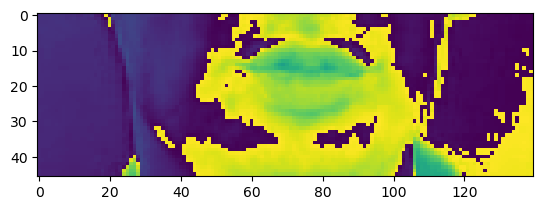

In [56]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video 
plt.imshow(val[0][0][35])

In [57]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'set blue with o two please'>

In [ ]:
#Deep Neural Network

In [58]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler